# After School Program Demo

Celestial Ministries is an arts-centered youth outreach in Lawndale, Chicago which was founded by Stanley and Antoinette Ratliff. During COVID-19, Celestial initiated a Zoom program involving a small group of 5th-10th graders on the use of Python Jupyter Notebooks.  For the past 2 years, a 12 lesson program has been conducted in person with mainly 8th graders.  Students who complete the program receive a certificate and $100 stipend. This year, the students will give a demo of the use of JNBs to parents and others attending the final recognition ceremony. 
        

We will demonstrate several things which can be done with Jupyter Notebooks.

First we load standard notebooks for analyzing and plotting data.
      

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt

<h3>DEMO 1: City of Chicago Budget</h3>
We will make a piechart of the City of Chicago budget.

1) First let's display the PDF with the budget details.

In [2]:
class PDF(object):
  def __init__(self, pdf, size=(300,300)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)
PDF('ChicagoBudget.pdf',size=(700,400))

In [12]:
from IPython.display import IFrame, display
filepath="ChicagoBudgetFull.pdf"
IFrame(filepath, width=700, height=400)


2) Next let's read an Excel sheet with the summary of the budget.

In [13]:
budget=pd.read_excel('ChicagoBudget.xlsx')
budget

,EXPENSE,2023 BUDGET
0,Finance and Administration,688251735
1,Infrastructure,1544641397
2,Public Safety,2711251614
3,Community Services,293957760
4,City Development,174766005
5,Regulatory,74509317
6,Legislative and Elections,92114035
7,General Financing,7761542137


3) A pie chart will show us the proportions.

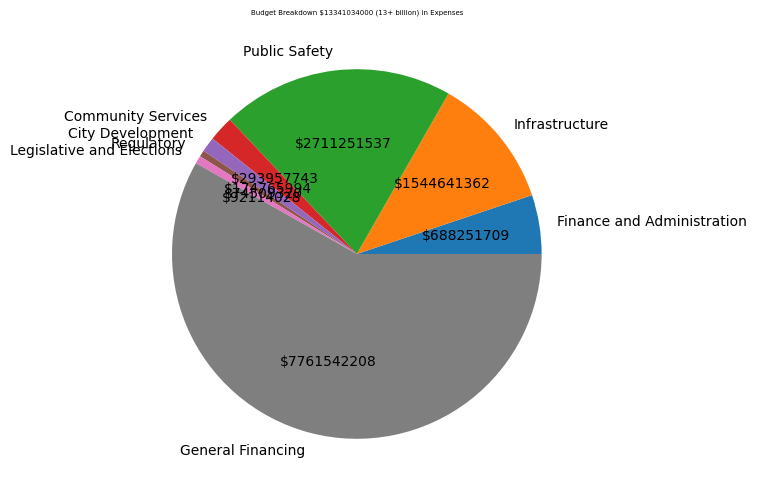

In [14]:
fig, ax = plt.subplots(figsize=(6,6)) #you can adjust the figsize  (5,5)=(length,width)
plt.rcParams['font.size'] = 10  #fontsize
budget_items = budget["EXPENSE"] #categories
budget_amounts = budget["2023 BUDGET"] #amounts
total=sum(budget_amounts)
ax=plt.pie(budget_amounts,labels=budget_items,autopct=lambda p: '${:.0f}'.format(p * total / 100)) #make pie chart  autopct='%1.0f%%'
plt.gca().set_title('Budget Breakdown $'+str(total)+' (13+ billion) in Expenses',size=5) #add a title
fig.savefig('Budget.png') #save the piechart to a file Budget.png

PROBLEM 1: Change the amounts on the pie chart to percentages.

<h3>Demo 2 Pixel Images</h3>
We can increase the resolution of images by increasing the number of pixels.

Note: Put the file puppy.png in a separate folder called images.

In [17]:
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 MB 3.8 MB/s eta 0:00:00:00:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for opencv-python (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [792 lines of output]
      
      
      --------------------------------------------------------------------------------
      -- Trying 'Ninja' generator
      --------------------------------
      ---------------------------
      ----------------------
      -----------------
      ------------
      -------
      --
      CMake Error: CMake was unable to find a build program corresponding to "Ninja".  CMAKE_MAKE_PROGRAM is not set.  You probably need to select a different build tool.Not searching for unused variables given on the command line.
      
      -- Configuring incomplete, errors occurred!
      --
      -

In [15]:
# PACKAGE: DO NOT EDIT THIS CELL
%matplotlib inline
from ipywidgets import interact
import cv2, os


ModuleNotFoundError: No module named 'cv2'

In [ ]:
def makepixelimage(folder, N):

    directory = folder

    # A data structure called a dictionary is used to store the image data and the dataframes we'll make from them.
    imgs = {}
    dfs = {}

    # Specify the pixel image size 
    dsize = (N, N)

    # This will iterate over every image in the directory given, read it into data, and create a 
    # dataframe for it. Both the image data and its corresponding dataframe are stored.
    # Note that when being read into data, we interpret the image as grayscale. 
    pos = 0
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(f):
            imgs[pos] = cv2.imread(f, 0) # image data
            imgs[pos] = cv2.resize(imgs[pos], dsize)
            dfs[pos] = pd.DataFrame(imgs[pos]) # dataframe
            pos += 1
    return plt.imshow(imgs[0], cmap="gray")


In [ ]:
makepixelimage("images", 8)

In [ ]:
makepixelimage("images", 16) #16x16 image

In [ ]:
makepixelimage("images", 32) #32x32 image

Problem 2: Create a 64x64 pixel image of the above.

<h3>DEMO 3: Track NFL Player Positions</h3>
We will plot the movement of two players step by step in a given play
Dataset: NFL_play.xlsx

1) Import special libraries.

In [ ]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

2)  Read the Player Tracking Data

In [ ]:
track_play=pd.read_excel('NFL_play.xlsx')
track_play.head(22)

3) Plot the positions of the players at step -108 (before the snap) of play 1136.

In [ ]:
fig= plt.figure(figsize=(8,4))
temp=track_play[track_play["step"]==-108]
xmin=temp["x_position"].min()
xmax=temp["x_position"].max()
ymin=temp["y_position"].min()
ymax=temp["y_position"].max()
plt.xlim(xmin-1,xmax+1)
plt.ylim(ymin-1,ymax+1)
for i in temp.index:
    x=temp.loc[i,"x_position"]
    y=temp.loc[i,"y_position"]
    n=temp.loc[i,"nfl_player_id"]
    p=temp.loc[i,"position"]
    if temp.loc[i,"team"]=='home':
        plt.text(x, y, p+str(n),color='b',size=5)
    else:
        plt.text(x, y, p+str(n),color='r',size=5)
plt.title("Play 1136 Step -108",size=10)
plt.show()

4) Let's define a function which gives the position of players at any step of any play.

In [ ]:
def teampositions(data,play,step):
    playdf=data[data["play_id"]==play]
    playdf = playdf.sort_values(by = 'step')
    playdf=playdf.reset_index(drop=True)
    stepdf=playdf[playdf["step"]==step]
    xmin=stepdf["x_position"].min()
    xmax=stepdf["x_position"].max()
    ymin=stepdf["y_position"].min()
    ymax=stepdf["y_position"].max()
    fig= plt.figure(figsize=(8,4))
    plt.xlim(xmin-1,xmax+1)
    plt.ylim(ymin-1,ymax+1)
    for i in stepdf.index:
        x=stepdf.loc[i,"x_position"]
        y=stepdf.loc[i,"y_position"]
        n=stepdf.loc[i,"nfl_player_id"]
        p=stepdf.loc[i,"position"]
        if stepdf.loc[i,"team"]=='home':
            plt.text(x, y, p+str(n),color='b',size=5)
        else:
            plt.text(x, y, p+str(n),color='r',size=5)
    plt.title("Play"+str(play)+ "  Step"+str(step),size=10)
    plt.show()
    return

In [ ]:
teampositions(track_play,1136,10)

5) Let's define a function to animate the movement of two designated players in a specified play. 

In [ ]:
def movement(data,play,player1,player2):
    playdf=data[data["play_id"]==play]
    playdf = playdf.sort_values(by = 'step')
    playdf=playdf.reset_index(drop=True)
    xmin=playdf["x_position"].min()
    xmax=playdf["x_position"].max()
    ymin=playdf["y_position"].min()
    ymax=playdf["y_position"].max()
    player1df=playdf[playdf["nfl_player_id"]==player1]
    player1df = player1df.sort_values(by = 'step')
    player1df=player1df.reset_index(drop=True)
    player2df=playdf[playdf["nfl_player_id"]==player2]
    player2df = player2df.sort_values(by = 'step')
    player2df=player2df.reset_index(drop=True)
    fig= plt.figure(figsize=(5,3))
    plt.xlim(xmin-1,xmax+1)
    plt.ylim(ymin-1,ymax+1)
    x1=player1df["x_position"]
    y1=player1df["y_position"]
    x2=player2df["x_position"]
    y2=player2df["y_position"]
    def init():  #inital point on sine curve\
        bluex,=plt.gca().plot([x1[0]],[y1[0]])
        redo, = plt.gca().plot([x2[0]],[y2[0]])
        return bluex, redo,

    def animate(i):
        bluex,= plt.gca().plot(x1[i],y1[i],'bx',ms=2,alpha=1)
        redo,=plt.gca().plot([x2[i]],[y2[i]],'ro',ms=2,alpha=1)
        return bluex, redo,
    # create animation using the animate() function
    ani = animation.FuncAnimation(fig, animate, frames=np.arange(1,len(playdf["step"])/22,1), init_func=init, interval=5, blit=True, repeat=False)
    plt.show() 
    return ani

6) Let's check the wide receiver (42347) and cornerback (43351) shown at the bottom of the chart in Step 4).

In [ ]:
%matplotlib notebook
movement(track_play,1136,42347,43351)

Problem 3: Change the defensive player in the animation from cornerback to the nearest free safety.

<h3>Demo 4 Word Clouds</h3>
Let's make a word cloud Christmas card using the song "Twelve Days of Christmas."

In [ ]:
import wordcloud
#Define a function which counts the interesting words
def calculate_frequencies(textfile):
    #list of punctuations
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    #list of uninteresting words 
    uninteresting_words = ["AND","BY","IT","THE","THAT","A","IS","HAD","TO","NOT","BUT","FOR","OF","WHICH","IF","IN","ON","WERE","YE","THOU"]
    
     # removes punctuation and uninteresting words
    import re
    fc1=str(textfile)
    fc2= fc1.split(' ')
    for i in range(len(fc2)): 
        fc2[i] = fc2[i].upper()
    #Remove punctuations
    fc3 = []
    for s in fc2:
        if not any([o in s for o in punctuations]):
            fc3.append(s)
    #Remove uninteresting words
    fc4=[]
    for s in fc3:
        if not any([o in s for o in uninteresting_words]):
            fc4.append(s)
    fc5=[]
    for s in fc4:
        if not any([o.lower() in s for o in uninteresting_words]):
            fc5.append(s)
            
    while('' in fc5) : 
        fc5.remove('') 
        
    import collections
    fc6 = collections.Counter(fc5)

    #wordcloud
    cloud = wordcloud.WordCloud( max_words = 15)  #can adjust the number of words
    cloud.generate_from_frequencies(fc6)
    return cloud.to_array()

In [ ]:
%matplotlib notebook
#Open the text file with the words to be plotted.
with open('twelvedays.txt','r') as file:  
    carol = file.readlines()
    
#make the wordcloud   
carol = calculate_frequencies(carol)
plt.imshow(carol, interpolation = 'nearest')
plt.text(-5,70,"Merry Christmas!",color='r',size=40) #***TASK 2***Add Christmas! after Merry
plt.axis('off')
plt.savefig('card.png', bbox_inches='tight') 


Problem 4. Remove the words Merry Christmas! from the Word Cloud.

<h3>Demo 5 Name that Tune</h3>

1) Musical sound waves are created by rapid vibrations caused by musical instruments. 

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('tVYQRC1-D54')

2)  Sound waves are represented mathematically by sine waves with different frequencies.

In [ ]:
def sinewave(frequency):
    #-----------CREATE THE SOUND WAVE-------------------
    sampling_rate=44100  #how many times we take a measurement each second
    t = np.linspace(0,1,sampling_rate)  # take 44100 samples in 1 second; 
    sound_wave=np.sin(frequency* 2*np.pi* t)  # mathematical definition of a sine wave
    #----------PLOT THE SOUND WAVE----------------------
    import matplotlib.pyplot as plt
    fig=plt.figure(figsize=(2,1))
    plt.plot(t,sound_wave)
    plt.xlabel("seconds")
    return

In [ ]:
sinewave(1)  #frequency=1 and 1 cycle per second

In [ ]:
sinewave(2)  #frequency=2 and 2 cycles per second

In [ ]:
sinewave(20) #frequency=20 and 20 cycles per second

3) A computer can create a musical tone based on a given frequency.

In [ ]:
def play(freq):
    import numpy as np
    from IPython.display import Audio  #library used to create sounds
    sampling_rate = 44100 # <- rate of sampling
    t = np.linspace(0, 2,  sampling_rate) # <- setup time values
    sound_wave = np.sin(2 * np.pi * freq * t) # <- sine function formula
    return Audio(sound_wave, rate=sampling_rate, autoplay=True) # play the generated sound

In [ ]:
play(220) # play a sound at 220 hz 

4) A musical scale is a sequence of frequencies.

In [ ]:
from IPython.display import Audio 
rest=0
do=220
re=9/8*220
mi=5/4*220
fa=4/3*220
so=3/2*220
la=5/3*220
ti=15/8*220
do1=2*220
re1=2*9/8*220
mi1=2*5/4*220
fa1=2*4/3*220
so1=2*3/2*220
la1=2*5/3*220
ti1=2*15/8*220
do2=2*2*220
scale=[do,re,mi,fa,so,la,ti,do1]

In [ ]:
def play(song):
    song=np.array(song)
    framerate = 44100
    t = np.linspace(0, len(song) / 2, round(framerate * len(song) / 2))[:-1]
    song_idx = np.floor(t * 2).astype(int)
    data = np.sin(2 * np.pi * song[song_idx] * t)
    return Audio(data, rate=framerate, autoplay=True)
play(scale)

5) Can you name that tune?

In [ ]:
tune= [so, so , la, la, so, fa,mi,rest,so, so , la, la, so, fa,mi,rest,so,so,la,ti,do1,do1,re1,re1,ti,la,ti,la,so,so,la,ti,do1,do1,ti,la,so,so,rest,rest,la,la,so,fa,mi,mi,rest,rest,so,so,do,fa,mi,mi,re,re,do,do,do,do,rest,rest]
play(tune)

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('L4PA-MFSM34')

Problem 5: Create a tune for a familiar worship song. 

<h3> Assignment</h3>
Explain how a JNB such as this could be used in a pre-college after school program. What should a college teacher be aware of in conducting such a program? Comment on how this demo could be improved.